In [21]:
import json
file_path = "C:/Users/yashw/Downloads/DevGPT/snapshot_20230831/20230831_073827_hn_sharings.json"
with open(file_path, 'rb') as file:
    json_data = json.loads(file.read())

In [22]:
import radon
import lizard
from radon.visitors import ComplexityVisitor
from radon.complexity import cc_rank
import matplotlib.pyplot as plt

def plot_languages_and_numbers(languages, numbers):
    plt.bar(languages, numbers, color='blue')
    plt.xlabel('Programming Languages')
    plt.ylabel('Average Complexity')
    plt.title('Popularity of Programming Languages')
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

def calculate_average_complexity_py(code):
    visitor = ComplexityVisitor.from_code(code)
    complexity_list = [block.complexity for block in visitor.blocks]

    if complexity_list:
        average_complexity = sum(complexity_list) / len(complexity_list)
    else:
        average_complexity = 0

    return average_complexity

def calculate_average_complexity_type(type,code):
    analysis_result = lizard.analyze_file.analyze_source_code(f"example.{type}", code)
    total_complexity = sum(function.cyclomatic_complexity for function in analysis_result.function_list)
    num_functions = len(analysis_result.function_list)

    return total_complexity / num_functions if num_functions > 0 else 0


def print_complexity_scale(average_complexity):
    scale = cc_rank(average_complexity)

    print(f"Average Complexity: {average_complexity:.2f}")
    print("Complexity Scale: {}".format(scale))

In [23]:
from collections import defaultdict
allowedLanguages = ['python', 'java','javascript','c','cpp','csharp']
overallComplex = defaultdict(list)
for x in json_data['Sources']:
  for i in x['ChatgptSharing']: 
    if 'Conversations' in i:
      for conversation in i['Conversations']:
        for listOfCode in conversation['ListOfCode']:
            if (listOfCode['Type']) in allowedLanguages:
                # exec(listOfCode['Content'])
                try:
                    if listOfCode['Type'] == 'python':
                        average_complexity = calculate_average_complexity_py(listOfCode['Content'])
                        # print(f'Got the average complexity as {average_complexity}')
                    else:
                        average_complexity = calculate_average_complexity_type(listOfCode['Type'],listOfCode['Content'])

                    scale = cc_rank(average_complexity)
                    print(f"Average Complexity of {listOfCode['Type']}: {average_complexity:.2f}")
                    print("Complexity Scale: {}".format(scale))
                    overallComplex[listOfCode['Type']].append(round(average_complexity,2))
                except:
                    if listOfCode['Type'] != 'python':
                       
                        print(f'Unkown Code encountered of language {listOfCode["Type"]}')
                    break
                    # if listOfCode["Type"] =='javascript':
                    #   print(listOfCode['Content'])
                print('--'*30)

                    # print_complexity_scale(average_complexity)


Average Complexity of python: 3.50
Complexity Scale: A
------------------------------------------------------------
Average Complexity of python: 2.00
Complexity Scale: A
------------------------------------------------------------
Average Complexity of python: 1.00
Complexity Scale: A
------------------------------------------------------------
Average Complexity of csharp: 2.00
Complexity Scale: A
------------------------------------------------------------
Average Complexity of python: 7.00
Complexity Scale: B
------------------------------------------------------------
Average Complexity of python: 3.67
Complexity Scale: A
------------------------------------------------------------
Average Complexity of python: 2.55
Complexity Scale: A
------------------------------------------------------------
Average Complexity of python: 0.00
Complexity Scale: A
------------------------------------------------------------
Average Complexity of python: 0.00
Complexity Scale: A
-----------------

In [24]:
for i in allowedLanguages:
  if len(overallComplex[i])>0:
    maxComplex = max(overallComplex[i])
    print(f'the maximum complex of {i} code, chat gpt offers is {maxComplex}')

the maximum complex of python code, chat gpt offers is 7.67
the maximum complex of java code, chat gpt offers is 1.0
the maximum complex of javascript code, chat gpt offers is 5.0
the maximum complex of c code, chat gpt offers is 6.5
the maximum complex of cpp code, chat gpt offers is 2.0
the maximum complex of csharp code, chat gpt offers is 2.0


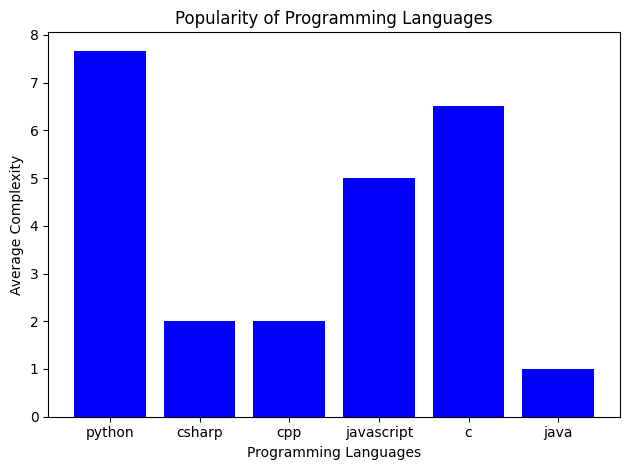

In [25]:
# Example data
languages = overallComplex.keys()
numbers = [max(x) if len(x) > 0 else 0 for x in overallComplex.values()]  # Replace with your actual data

# Plot the bar graph
plot_languages_and_numbers(languages, numbers)
